<a href="https://colab.research.google.com/github/Ramotlokoane/Python-File/blob/main/Ramotlokoane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 OSI vs TCP/IP Network Model Visualizer
This interactive notebook helps you understand the relationship between the OSI and TCP/IP networking models.

1. Static Model Comparison


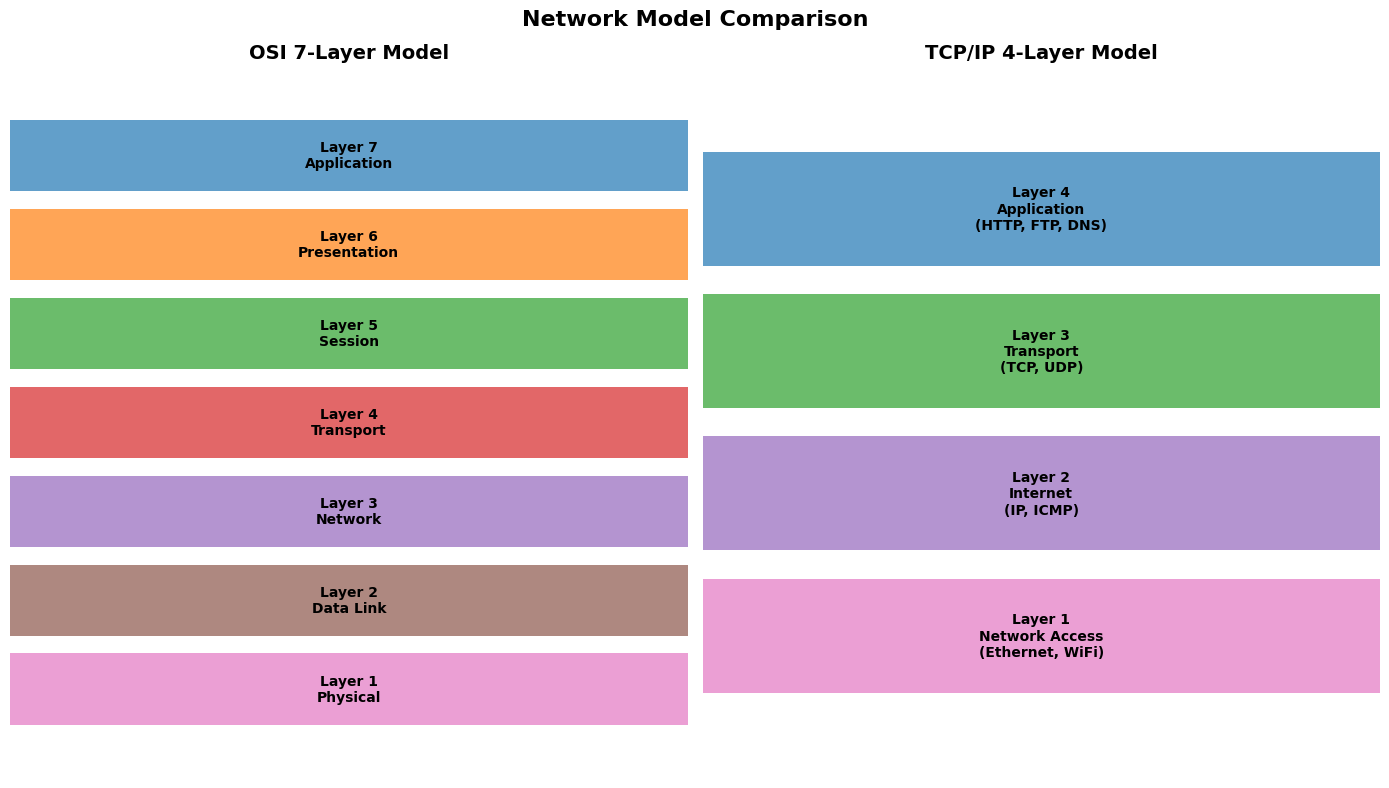


2. Animated Layer Mapping



3. Data Flow Animation



4. Interactive Layer Comparison
Select an OSI layer from the dropdown to see how it maps to the TCP/IP model:


interactive(children=(Dropdown(description='OSI Layer:', options=(None, 'Application', 'Presentation', 'Sessio…


📚 Key Points:
- OSI Model: Theoretical 7-layer framework for understanding network communications
- TCP/IP Model: Practical 4-layer implementation used on the internet
- OSI Application, Presentation, and Session layers map to TCP/IP Application layer
- OSI Transport maps directly to TCP/IP Transport
- OSI Network maps to TCP/IP Internet
- OSI Data Link and Physical map to TCP/IP Network Access


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, HTML
import time

# Set up the figure
plt.style.use('ggplot') # Changed from 'seaborn'
plt.rcParams["figure.figsize"] = (12, 8)

# Network model data
osi_layers = {
    7: "Application",
    6: "Presentation",
    5: "Session",
    4: "Transport",
    3: "Network",
    2: "Data Link",
    1: "Physical"
}

tcpip_layers = {
    4: "Application\n(HTTP, FTP, DNS)",
    3: "Transport\n(TCP, UDP)",
    2: "Internet\n(IP, ICMP)",
    1: "Network Access\n(Ethernet, WiFi)"
}

mapping = {
    "Application": ["Application"],
    "Presentation": ["Application"],
    "Session": ["Application"],
    "Transport": ["Transport"],
    "Network": ["Internet"],
    "Data Link": ["Network Access"],
    "Physical": ["Network Access"]
}

# Static comparison visualization
def static_comparison():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

    # OSI Model
    for i, (layer_num, layer_name) in enumerate(osi_layers.items()):
        y_pos = 7 - i
        ax1.barh(y_pos, 5, color=plt.cm.tab10(i), alpha=0.7)
        ax1.text(2.5, y_pos, f"Layer {layer_num}\n{layer_name}",
                ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    ax1.set_xlim(0, 5)
    ax1.set_ylim(0, 8)
    ax1.set_title('OSI 7-Layer Model', fontsize=14, fontweight='bold')
    ax1.axis('off')

    # TCP/IP Model
    for i, (layer_num, layer_name) in enumerate(tcpip_layers.items()):
        y_pos = 4 - i
        ax2.barh(y_pos, 5, color=plt.cm.tab10(i*2), alpha=0.7)
        ax2.text(2.5, y_pos, f"Layer {layer_num}\n{layer_name}",
                ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    ax2.set_xlim(0, 5)
    ax2.set_ylim(0, 5)
    ax2.set_title('TCP/IP 4-Layer Model', fontsize=14, fontweight='bold')
    ax2.axis('off')

    plt.suptitle('Network Model Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Animated mapping visualization
def animated_mapping():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
    fig.suptitle('OSI to TCP/IP Layer Mapping', fontsize=16, fontweight='bold')

    # Initialize OSI model
    osi_rects = []
    for i, (layer_num, layer_name) in enumerate(osi_layers.items()):
        y_pos = 7 - i
        rect = ax1.barh(y_pos, 5, color=plt.cm.tab10(i), alpha=0.3)[0]
        osi_rects.append(rect)
        ax1.text(2.5, y_pos, f"Layer {layer_num}\n{layer_name}",
                ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    ax1.set_xlim(0, 5)
    ax1.set_ylim(0, 8)
    ax1.set_title('OSI Model', fontsize=14, fontweight='bold')
    ax1.axis('off')

    # Initialize TCP/IP model
    tcpip_rects = []
    for i, (layer_num, layer_name) in enumerate(tcpip_layers.items()):
        y_pos = 4 - i
        rect = ax2.barh(y_pos, 5, color=plt.cm.tab10(i*2), alpha=0.3)[0]
        tcpip_rects.append(rect)
        ax2.text(2.5, y_pos, f"Layer {layer_num}\n{layer_name}",
                ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    ax2.set_xlim(0, 5)
    ax2.set_ylim(0, 5)
    ax2.set_title('TCP/IP Model', fontsize=14, fontweight='bold')
    ax2.axis('off')

    # Animation function
    def update(frame):
        # Reset all alphas
        for rect in osi_rects:
            rect.set_alpha(0.3)
        for rect in tcpip_rects:
            rect.set_alpha(0.3)

        # Highlight current layer
        if frame < 7:  # OSI layers
            osi_rects[frame].set_alpha(0.8)
            layer_name = osi_layers[7-frame]
            mapped = mapping[layer_name]

            # Highlight corresponding TCP/IP layers
            for i, (layer_num, tcpip_name) in enumerate(tcpip_layers.items()):
                for m in mapped:
                    if m in tcpip_name:
                        tcpip_rects[4-layer_num].set_alpha(0.8)
        else:  # TCP/IP layers
            tcpip_frame = frame - 7
            tcpip_rects[tcpip_frame].set_alpha(0.8)
            layer_num = 4 - tcpip_frame
            tcpip_name = tcpip_layers[layer_num]

            # Highlight corresponding OSI layers
            for osi_name, mapped_names in mapping.items():
                for m in mapped_names:
                    if m in tcpip_name:
                        layer_idx = 7 - [k for k, v in osi_layers.items() if v == osi_name][0]
                        osi_rects[layer_idx].set_alpha(0.8)


        return osi_rects + tcpip_rects

    # Create animation
    ani = FuncAnimation(fig, update, frames=11, interval=1500, blit=False, repeat=True)

    # Display in notebook
    plt.close()  # Prevent double display
    return HTML(ani.to_jshtml())

# Protocol flow visualization
def protocol_flow():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
    fig.suptitle('Data Flow Through Network Models', fontsize=16, fontweight='bold')

    # OSI Model
    for i, (layer_num, layer_name) in enumerate(osi_layers.items()):
        y_pos = 7 - i
        ax1.barh(y_pos, 5, color=plt.cm.tab10(i), alpha=0.7)
        ax1.text(2.5, y_pos, f"Layer {layer_num}\n{layer_name}",
                ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    ax1.set_xlim(0, 5)
    ax1.set_ylim(0, 8)
    ax1.set_title('OSI Model - Encapsulation', fontsize=14, fontweight='bold')
    ax1.axis('off')

    # TCP/IP Model
    for i, (layer_num, layer_name) in enumerate(tcpip_layers.items()):
        y_pos = 4 - i
        ax2.barh(y_pos, 5, color=plt.cm.tab10(i*2), alpha=0.7)
        ax2.text(2.5, y_pos, f"Layer {layer_num}\n{layer_name}",
                ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    ax2.set_xlim(0, 5)
    ax2.set_ylim(0, 5)
    ax2.set_title('TCP/IP Model - Encapsulation', fontsize=14, fontweight='bold')
    ax2.axis('off')

    # Animation elements
    osi_dots = [ax1.plot([], [], 'ko', markersize=10)[0] for _ in range(7)]
    tcpip_dots = [ax2.plot([], [], 'ko', markersize=10)[0] for _ in range(4)]

    # Animation function
    def update(frame):
        # OSI animation
        for i, dot in enumerate(osi_dots):
            if i <= frame % 7:
                dot.set_data([1.5], [7 - i])
            else:
                dot.set_data([], [])

        # TCP/IP animation (slower progression)
        tcpip_frame = int(frame / 1.75)  # Scale to make TCP/IP animation slower
        for i, dot in enumerate(tcpip_dots):
            if i <= tcpip_frame % 4:
                dot.set_data([1.5], [4 - i])
            else:
                dot.set_data([], [])

        return osi_dots + tcpip_dots

    # Create animation
    ani = FuncAnimation(fig, update, frames=14, interval=800, blit=False, repeat=True)

    # Display in notebook
    plt.close()  # Prevent double display
    return HTML(ani.to_jshtml())

# Interactive comparison tool
def interactive_comparison(layer=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

    # Highlight color
    highlight_color = '#FF5733'

    # OSI Model
    for i, (layer_num, layer_name) in enumerate(osi_layers.items()):
        y_pos = 7 - i
        color = highlight_color if layer == layer_name else plt.cm.tab10(i)
        alpha = 0.9 if layer == layer_name else 0.7
        ax1.barh(y_pos, 5, color=color, alpha=alpha)
        ax1.text(2.5, y_pos, f"Layer {layer_num}\n{layer_name}",
                ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    ax1.set_xlim(0, 5)
    ax1.set_ylim(0, 8)
    ax1.set_title('OSI 7-Layer Model', fontsize=14, fontweight='bold')
    ax1.axis('off')

    # TCP/IP Model
    for i, (layer_num, layer_name) in enumerate(tcpip_layers.items()):
        y_pos = 4 - i
        # Check if this TCP/IP layer maps to the selected OSI layer
        is_highlighted = False
        if layer:
            mapped = mapping.get(layer, [])
            for m in mapped:
                if m in layer_name:
                    is_highlighted = True
                    break

        color = highlight_color if is_highlighted else plt.cm.tab10(i*2)
        alpha = 0.9 if is_highlighted else 0.7
        ax2.barh(y_pos, 5, color=color, alpha=alpha)
        ax2.text(2.5, y_pos, f"Layer {layer_num}\n{layer_name}",
                ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    ax2.set_xlim(0, 5)
    ax2.set_ylim(0, 5)
    ax2.set_title('TCP/IP 4-Layer Model', fontsize=14, fontweight='bold')
    ax2.axis('off')

    if layer:
        plt.suptitle(f'Showing mapping for OSI {layer} layer', fontsize=16, fontweight='bold')
    else:
        plt.suptitle('Select an OSI layer to see TCP/IP mapping', fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Create dropdown for interactive comparison
layer_dropdown = widgets.Dropdown(
    options=[None] + list(osi_layers.values()),
    description='OSI Layer:',
    disabled=False,
)

# Display functions
def display_visualizer():
    print("📊 OSI vs TCP/IP Network Model Visualizer")
    print("This interactive notebook helps you understand the relationship between the OSI and TCP/IP networking models.")

    # Static comparison
    print("\n1. Static Model Comparison")
    static_comparison()

    # Animated mapping
    print("\n2. Animated Layer Mapping")
    display(animated_mapping())
    time.sleep(1)  # Allow time for animation to load

    # Protocol flow
    print("\n3. Data Flow Animation")
    display(protocol_flow())
    time.sleep(1)  # Allow time for animation to load

    # Interactive comparison
    print("\n4. Interactive Layer Comparison")
    print("Select an OSI layer from the dropdown to see how it maps to the TCP/IP model:")
    interact(interactive_comparison, layer=layer_dropdown)

    # Explanation
    print("\n📚 Key Points:")
    print("- OSI Model: Theoretical 7-layer framework for understanding network communications")
    print("- TCP/IP Model: Practical 4-layer implementation used on the internet")
    print("- OSI Application, Presentation, and Session layers map to TCP/IP Application layer")
    print("- OSI Transport maps directly to TCP/IP Transport")
    print("- OSI Network maps to TCP/IP Internet")
    print("- OSI Data Link and Physical map to TCP/IP Network Access")

# Run the visualizer
display_visualizer()